In [1]:
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2_imshow(img)
    cv2.waitKey(0)

cv2.destroyAllWindows() 

In [4]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
from keras.utils import np_utils


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [8]:
import keras
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import SGD 


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [9]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.6000 - accuracy: 0.8115 - val_loss: 0.2088 - val_accuracy: 0.9359
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2992 - accuracy: 0.9093 - val_loss: 0.1444 - val_accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2417 - accuracy: 0.9270 - val_loss: 0.1174 - val_accuracy: 0.9645
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1995 - accuracy: 0.9398 - val_loss: 0.0943 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1640 - accuracy: 0.9516 - val_loss: 0.0800 - val_accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1387 - accuracy: 0.9585 - val_loss: 0.0664 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1205 - accuracy: 0.9630 - val_loss: 0.0599 - val_accuracy

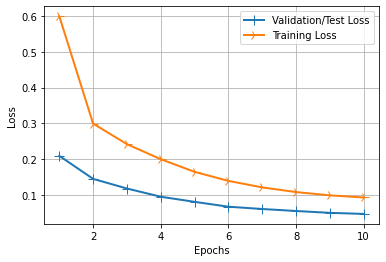

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()